Softmax:  [0.7335, 0.816, 0.8445, 0.854, 0.8595, 0.867, 0.8555]
Max:  [0.4995, 0.5105, 0.4885, 0.507, 0.513, 0.5035, 0.501]


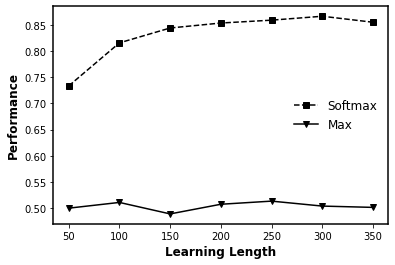

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import pickle
legend_properties = {'weight':'bold'}
data_folder = r"E:\data\hai-0307\Fang2009_8"
performance_softmax_file = data_folder + r"\softmax_performance_across_learning"
performance_max_file = data_folder + r"\max_performance_across_learning"

with open(performance_softmax_file, 'rb') as infile:
    softmax_performance = pickle.load(infile)
with open(performance_max_file, 'rb') as infile:
    max_performance = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_performance)
print("Max: ", max_performance)
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, softmax_performance, "k--s", label="Softmax")
plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_Max_performance.png", transparent=True, dpi=300)
plt.show()
plt.clf()

Softmax:  [0.7335, 0.816, 0.8445, 0.854, 0.8595, 0.867, 0.8555]
Max:  [0.4995, 0.5105, 0.4885, 0.507, 0.513, 0.5035, 0.501]


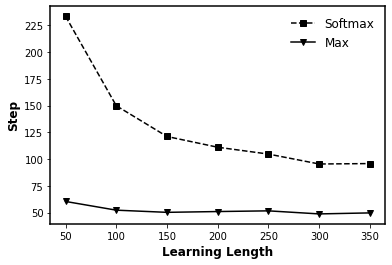

<Figure size 432x288 with 0 Axes>

In [3]:
data_folder = r"E:\data\hai-0307\Fang2009_8"
step_softmax_file = data_folder + r"\softmax_steps_across_learning"
step_max_file = data_folder + r"\max_steps_across_learning"

with open(step_softmax_file, 'rb') as infile:
    softmax_step = pickle.load(infile)
with open(step_max_file, 'rb') as infile:
    max_step = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_performance)
print("Max: ", max_performance)
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, softmax_step, "k--s", label="Softmax")
plt.plot(x, max_step, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Step', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_Max_step.png", transparent=True, dpi=300)
plt.show()
plt.clf()

Softmax:  [0.01666357421875, 0.024072265625, 0.02816015625, 0.030505859375, 0.03210986328125, 0.032755859375, 0.03330615234375]
Max:  [0.01668408203125, 0.02402978515625, 0.02822705078125, 0.03066064453125, 0.03184423828125, 0.03268359375, 0.03336669921875]


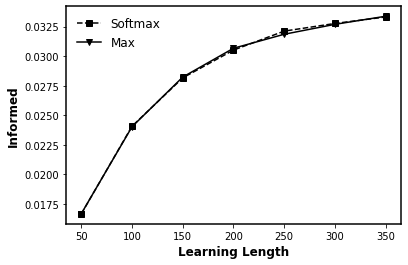

<Figure size 432x288 with 0 Axes>

In [4]:
data_folder = r"E:\data\hai-0307\Fang2009_8"
informed_softmax_file = data_folder + r"\softmax_informed_across_learning"
informed_max_file = data_folder + r"\max_informed_across_learning"

with open(informed_softmax_file, 'rb') as infile:
    softmax_informed = pickle.load(infile)
with open(informed_max_file, 'rb') as infile:
    max_informed = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_informed)
print("Max: ", max_informed)
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, softmax_informed, "k--s", label="Softmax")
plt.plot(x, max_informed, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Informed', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_Max_informed.png", transparent=True, dpi=300)
plt.show()
plt.clf()

Softmax:  [0.01681298828125, 0.0169453125, 0.01667041015625, 0.016845703125, 0.016701171875, 0.01664453125, 0.01660546875, 0.0167705078125, 0.0168232421875]
Max:  [0.01668408203125, 0.02402978515625, 0.02822705078125, 0.03066064453125, 0.03184423828125, 0.03268359375, 0.03336669921875]


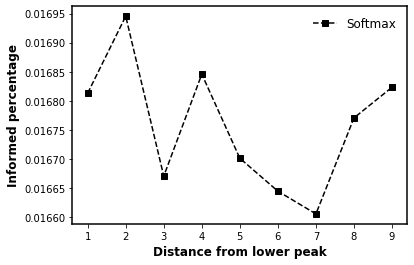

<Figure size 432x288 with 0 Axes>

In [6]:
data_folder = r"E:\data\hai-0307\Fang2009_8"
informed_softmax_file = data_folder + r"\informed_across_distance"

with open(informed_softmax_file, 'rb') as infile:
    softmax_informed = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_informed)
print("Max: ", max_informed)
# Performance
distance_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(distance_list, softmax_informed, "k--s", label="Softmax")
# plt.plot(distance_list, max_informed, "k-v", label="Max")
plt.xlabel('Distance from lower peak', fontweight='bold', fontsize=12)
plt.ylabel('Informed percentage', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_max_informed.png", transparent=True, dpi=300)
plt.show()
plt.clf()